# ДЗ

Пиксельная маска части изображения

Дано:
- изображение (формат jpg/png)
- диапазон строк для маски (y_min, y_max)
- диапазон столбцов для маски (x_min, x_max)
- число разбиений на области (h, например, для h=10 маска разбивается на 10*10=100 равных областей)

Требуется:
- написать алгоритм усреднения цвета в каждой области (усреднение по каждому цветовому каналу: R,G,B)
- прислать файл(ы): исходное изображение, изображение с маской, код (для работы в формате ipynb - всё в одном файле, в противном случае - все файлы поместить в один архив)
- назвать файл по шаблону на латинице без пробелов: Группа_Фамилия_НомерРаботы (например, 11-000_Ivanov_1)

# Реализация алгоритма

In [252]:
from matplotlib.image import imread, imsave
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

h = 10
x_min, x_max = 110, 310
y_min, y_max = 120, 320


def censore_img(orig_image):
    l = orig_image.shape[0] // h
    segment = orig_image[y_min:y_max, x_min:x_max]
    rows = np.split(segment, h) # np.concatenate(rows, 0) - reverse function

    for row in rows:
        squares = np.split(row, h, 1)
        for square in squares:
            square[0:l, 0:l] = np.mean(square[0:l, 0:l], axis=(0, 1))

    orig_image[y_min:y_max, x_min:x_max] = np.concatenate(rows, 0)
    plt.axis('off')
    plt.imshow(orig_image)

# Стоковое изображение

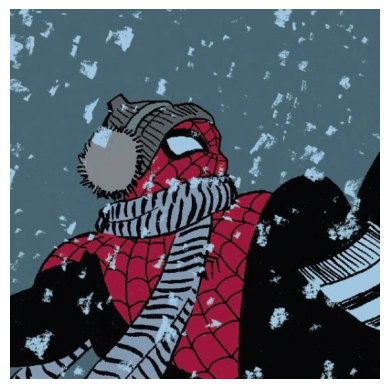

In [253]:
image = imread('https://i.pinimg.com/originals/48/ce/04/48ce04342fcb040cc3574b864c6bd434.jpg')
plt.axis('off')
plt.imshow(image)

# Результат

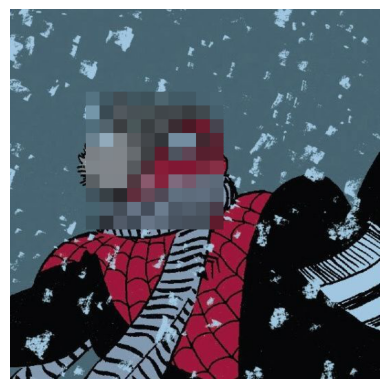

In [254]:
censore_img(image)